- 안전운전자 예측
  - EDA - 베이스라인모델(LightGBM) - 성능개선1(LightGBM + 피처엔지니어링, 파라메터최적화) - 성능개선2(XGBoost) - 성능개선3(앙상블)

In [139]:
import pandas as pd

In [140]:
# https://drive.google.com/file/d/14bYukzdAEZiikPMFHH9V_xzcsobAUgS7/view?usp=drive_link
import gdown
file_id = '14bYukzdAEZiikPMFHH9V_xzcsobAUgS7'
download_url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(download_url, 'data.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=14bYukzdAEZiikPMFHH9V_xzcsobAUgS7
From (redirected): https://drive.google.com/uc?id=14bYukzdAEZiikPMFHH9V_xzcsobAUgS7&confirm=t&uuid=302af38f-567e-41c1-8e9f-e876a11f842c
To: /content/data.zip
100%|██████████| 116M/116M [00:00<00:00, 167MB/s]


'data.zip'

In [141]:
!unzip 'data.zip'

Archive:  data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


In [142]:
df = pd.read_csv('/content/drive/MyDrive/data/safe_drive.csv')

In [143]:
# 피처요약표
# 결측값 시각
# 결측값 처리 :
  # 많으면 제거
  # 많지 않으면 대처
  # 결측값 자체가 예측에 도움이 되는경우 하나의 고유값으로 간주
# 머신러닝 모델 OOF 예측, LightGBM(마이크로소프트), XGBoost(부스팅 알고지름,결정트리를 직렬배치), 앙상블(여러개 조합)
# 피처엔지니어링 :
# 하이퍼 파라메터 최적화 : 베이지안 최적화
  # 베이지안 최적화 : 차원축소 와 같이 사용하면 효과

In [144]:
data = df.copy()

In [145]:
# 시각화

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [147]:
# 음수데이터를 na로 치환

In [148]:
data.replace(-1, pd.NA, inplace=True)

<Axes: >

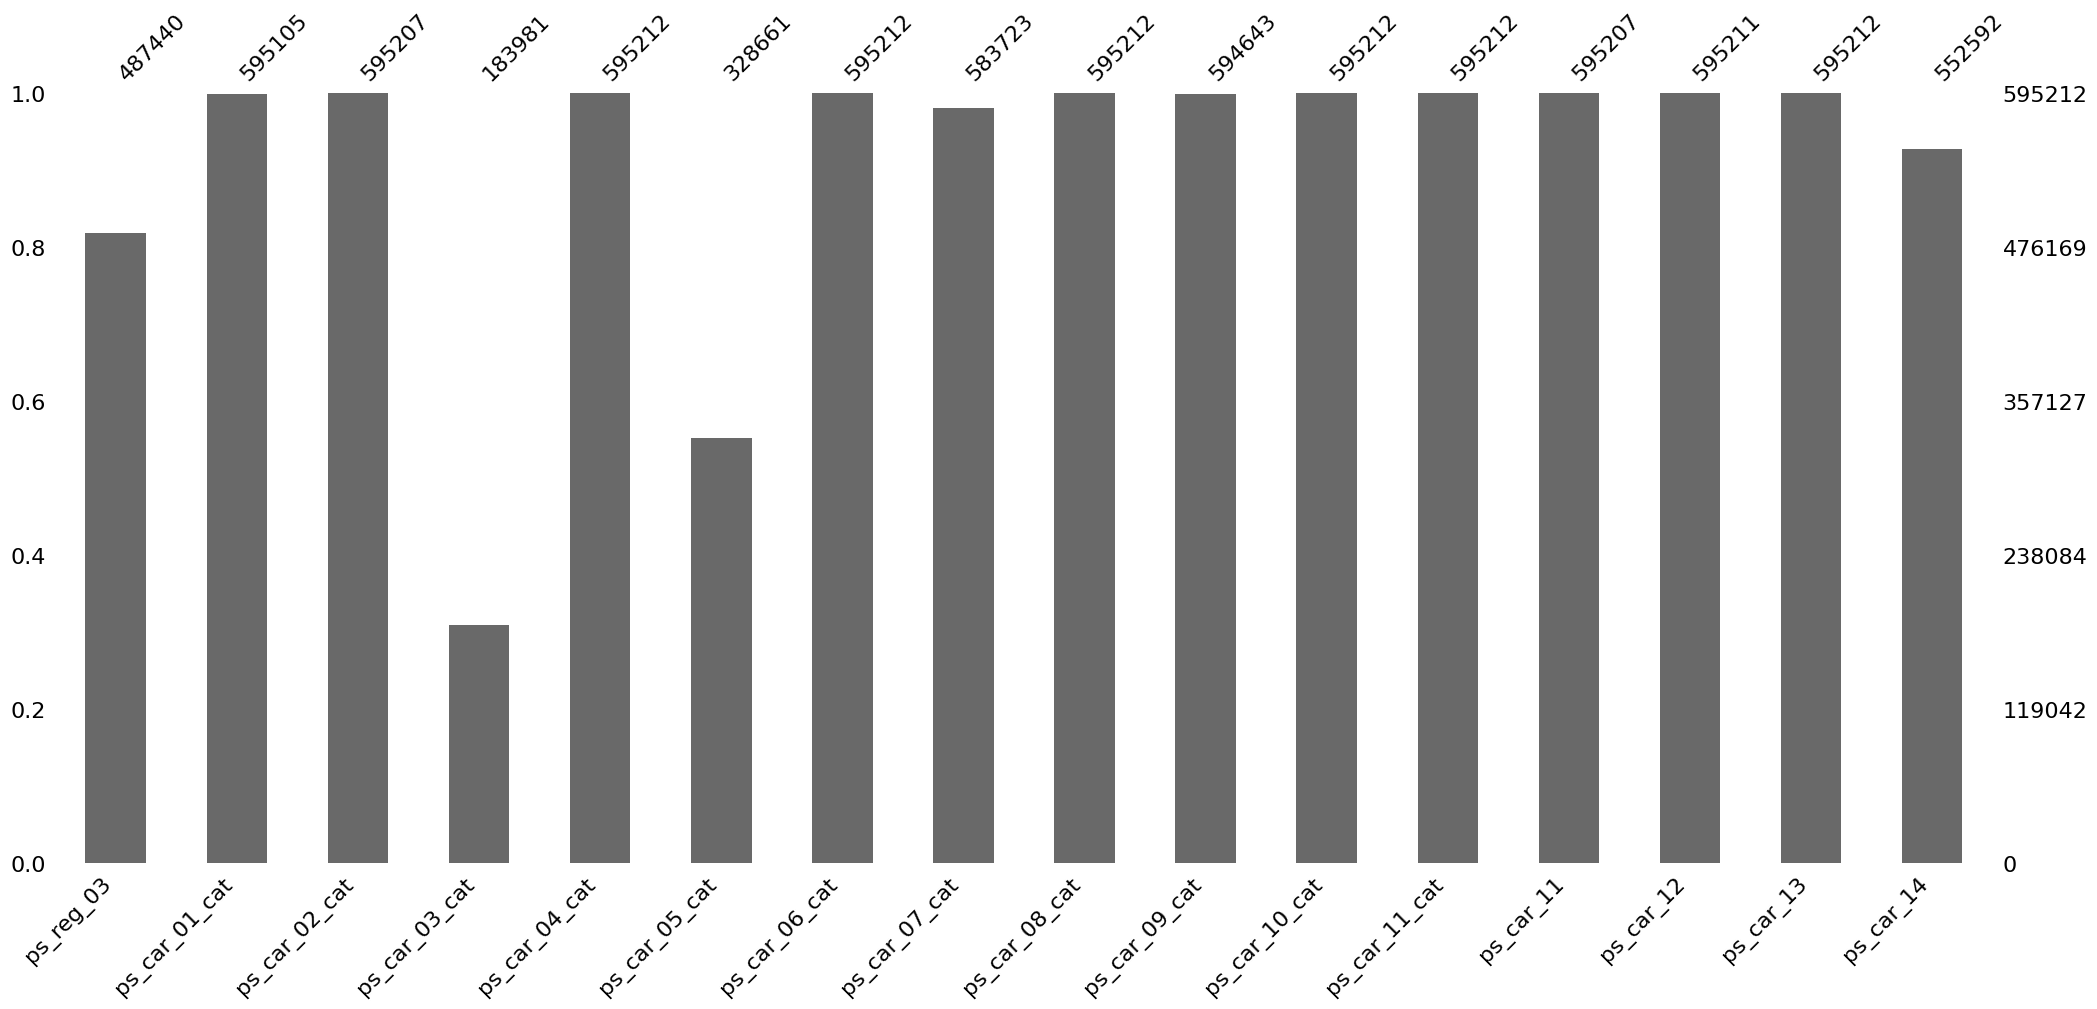

In [149]:
msno.bar(df=data.loc[:,'ps_reg_03':'ps_car_14'])

In [150]:
summary = pd.DataFrame(df.dtypes,columns=['데이터 타입'])
summary['결측값 개수'] = df.isna().sum()
summary['고윳값 개수'] = df.nunique().values
summary['데이터 종류'] = None
for indexName in summary.index:
  if 'bin' in indexName:
    summary.loc[indexName,'데이터 종류'] = '이진형'
  elif 'cat' in indexName:
    summary.loc[indexName,'데이터 종류'] = '명목형'
  elif summary.loc[indexName,'데이터 타입'] == float:
    summary.loc[indexName,'데이터 종류'] = '연속형'
  elif summary.loc[indexName,'데이터 타입'] == int:
    summary.loc[indexName,'데이터 종류'] = '순서형'
summary


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
id,int64,0,595212,순서형
target,int64,0,2,순서형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,0,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,0,3,명목형
ps_ind_05_cat,int64,0,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형


In [151]:
summary['데이터 종류'].value_counts()

,count
데이터 종류,
순서형,18
이진형,17
명목형,14
연속형,10


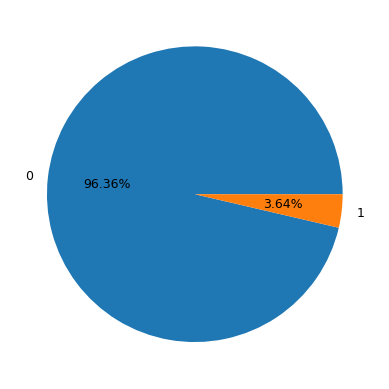

In [152]:
# 데이터 시각화
# 타겟의 분포 - 전략.... 데이터의 편향 - %도 표시
plt.pie(df['target'].value_counts(),
        labels=df['target'].value_counts().index,
        autopct='%.2f%%'
        )
plt.show()

In [153]:
# 이진계열은... bar 형태로 시각화 유리
bin_feature = summary.loc[summary['데이터 종류']=='이진형'].index
bin_feature

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')

In [154]:
# 시각화 함수
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def plot_target_ratio_by_features(df, features, num_rows, num_cols,size=(12,18)):
  mpl.rc('font', size=9)
  plt.figure(figsize=size)
  grid = gridspec.GridSpec(ncols=num_cols, nrows=num_rows)
  plt.subplots_adjust(hspace=0.3, wspace=0.3)

  for i, feature in enumerate(features):
    ax = plt.subplot(grid[i])
    sns.barplot(x=feature, y='target', data=df, ax=ax)
  plt.show()

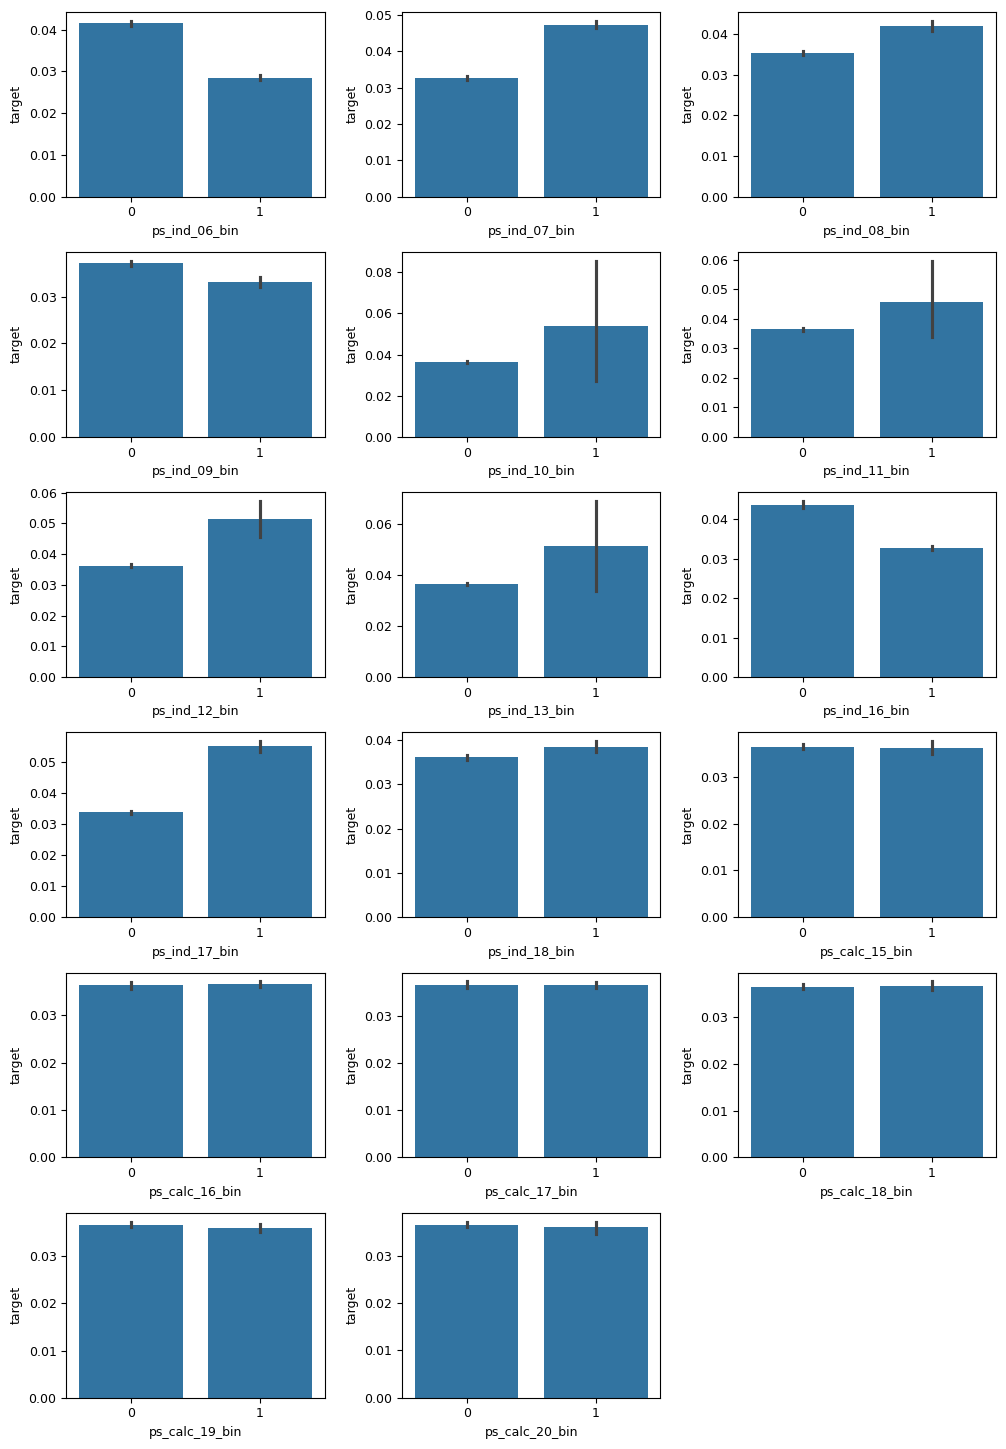

In [155]:
bin_feature = summary.loc[summary['데이터 종류']=='이진형'].index
plot_target_ratio_by_features(df, bin_feature, num_rows=6, num_cols=3)

In [156]:
# 명목형, 연속형, 및 데이터종류별로 시각화 함수를 통해서 시각화

In [157]:
# 상관관계 : 연속형 데이터
# 결측치 제거 : heatmap

In [158]:
reg_indexs = summary[summary['데이터 종류'] == '연속형'].index

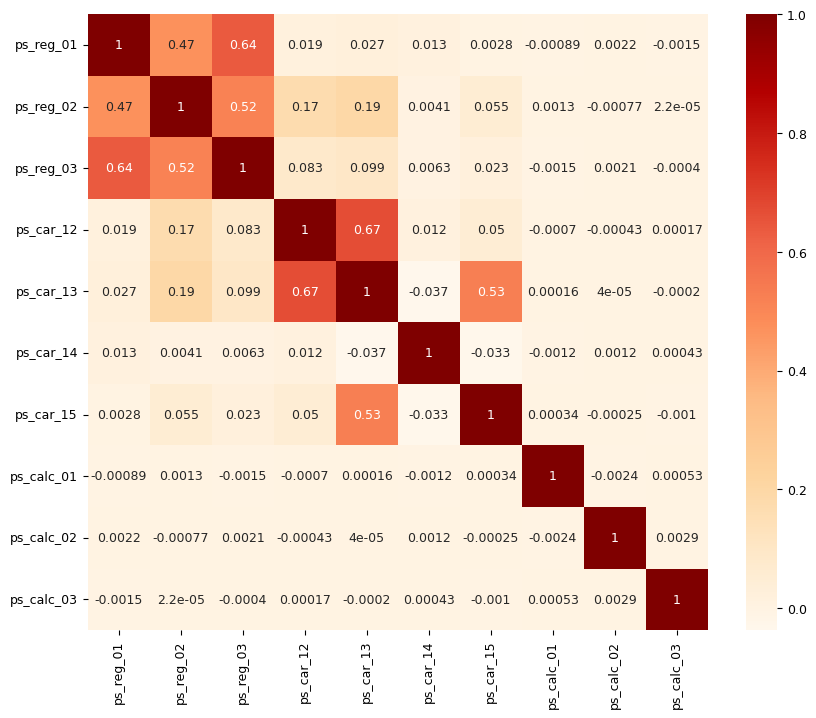

In [159]:
plt.figure(figsize=(10,8))
train_copy =  df.copy().dropna()

corr = train_copy.loc[:,reg_indexs].corr()
sns.heatmap(corr, cmap='OrRd', annot=True)
plt.show()

- 베이스라인 모델

In [160]:
X = df.drop(columns=['id','target'])
Y = df['target']

In [161]:
# 카테고리형태의 명목형 피처는 onehot인코딩
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_feature = summary.loc[summary['데이터 종류'] == '명목형'].index
X_cat = ohe.fit_transform(X.loc[:,cat_feature])
X_cat

<595212x184 sparse matrix of type '<class 'numpy.float64'>'
	with 8332968 stored elements in Compressed Sparse Row format>

In [162]:
# 피처제거
drop_feature = cat_feature

In [163]:
X =X.drop(columns=drop_feature)
X = X.reset_index(drop=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 43 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ps_ind_01       595212 non-null  int64  
 1   ps_ind_03       595212 non-null  int64  
 2   ps_ind_06_bin   595212 non-null  int64  
 3   ps_ind_07_bin   595212 non-null  int64  
 4   ps_ind_08_bin   595212 non-null  int64  
 5   ps_ind_09_bin   595212 non-null  int64  
 6   ps_ind_10_bin   595212 non-null  int64  
 7   ps_ind_11_bin   595212 non-null  int64  
 8   ps_ind_12_bin   595212 non-null  int64  
 9   ps_ind_13_bin   595212 non-null  int64  
 10  ps_ind_14       595212 non-null  int64  
 11  ps_ind_15       595212 non-null  int64  
 12  ps_ind_16_bin   595212 non-null  int64  
 13  ps_ind_17_bin   595212 non-null  int64  
 14  ps_ind_18_bin   595212 non-null  int64  
 15  ps_reg_01       595212 non-null  float64
 16  ps_reg_02       595212 non-null  float64
 17  ps_reg_03 

In [164]:
# X와 X_cat 합친다.
X.shape, X_cat.shape

((595212, 43), (595212, 184))

In [165]:
all_data = pd.concat([X,pd.DataFrame(X_cat.toarray())], axis=1)

In [166]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [167]:
# from sklearn.model_selection import train_test_split
# x, x_test, y, y_test = train_test_split(all_data, y, test_size=0.2, random_state=42)
num_train = int(len(all_data)*0.8)
x = all_data[:num_train]
x_test = all_data[num_train:]
y = Y[:num_train]
y_test = Y[num_train:]

In [168]:
import lightgbm as lgb
params = {
    'objective':'binary',
    'learning_rate':0.01,
    'force_row_wise':True,
    'random_state':0
}

In [169]:
x

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,174,175,176,177,178,179,180,181,182,183
0,2,5,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,9,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476164,6,4,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
476165,4,3,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476166,2,11,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
476167,1,6,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
from sklearn.metrics import roc_auc_score
for idx,(train_idx, valid_idx) in enumerate(folds.split(x,y)):
  print("#"*40,f'폴드 {idx+1} / 폴드{folds.n_splits}', '#'*40)
  # 훈련용 데이터 ,검증용 데이터
  x_train,y_train = x.iloc[train_idx], y.iloc[train_idx]
  x_valid, y_valid = x.iloc[valid_idx], y.iloc[valid_idx]
  # light gbm 전용 데이터셋
  dtrain = lgb.Dataset(x_train, y_train)
  dvalid = lgb.Dataset(x_valid, y_valid)
  # 모델 훈련
  lgb_model = lgb.train(params, dtrain,
                        valid_sets=dvalid ,
                        callbacks=[lgb.early_stopping(10)] # Use early_stopping callback
                        )
  # 모델 저장
  lgb_model.save_model(f'lgbm_model_{idx+1}.txt')
  # roc_auc_score 측정
  valid_preds = lgb_model.predict(x_valid)
  score = roc_auc_score(y_valid, valid_preds)
  print(f'ROC AUC : {score}')



######################################## 폴드 1 / 폴드5 ########################################
[LightGBM] [Info] Number of positive: 13873, number of negative: 367062
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 380935, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036418 -> initscore=-3.275586
[LightGBM] [Info] Start training from score -3.275586
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.153262
ROC AUC : 0.6290376017447316
######################################## 폴드 2 / 폴드5 ########################################
[LightGBM] [Info] Number of positive: 13873, number of negative: 367062
[LightGBM] [Info] Total Bins 1546
[LightGBM] [Info] Number of data points in the train set: 380935, number of used features: 226
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036418 -> initscore=-3.275586
[LightGBM] [Info] S

In [171]:
# 성능 개선
# 피처엔지니어링 + 하이퍼 파라메터 튜닝

 - 피처 엔지니어링

In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
train = pd.read_csv('/content/drive/MyDrive/data/safe_drive.csv')

In [71]:
all_data = train.drop('target', axis=1) # 타깃값 제거

all_features = all_data.columns # 전체 피처

In [72]:
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처
cat_features = [feature for feature in all_features if 'cat' in feature]
# 원-핫 인코딩 적용

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

In [73]:
# '데이터 하나당 결측값 개수'를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [74]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)]
# num_missing을 remaining_features에 추가
remaining_features.append('num_missing')

In [77]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
all_data['mix_ind']=''
for ind_feature in ind_features:
  all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [79]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x:
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [80]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [81]:
from scipy import sparse
# 필요 없는 피처들
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# remaining_features, cat_count_features에서 drop_features를 제거한 데이터
all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

# 데이터 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [82]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [83]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [87]:
# LightGBM용 gini() 함수
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

In [88]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# 8:2 비율로 훈련 데이터, 검증 데이터 분리 (베이지안 최적화 수행용)
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=0)

# 베이지안 최적화용 데이터셋
bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [89]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

In [96]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''

    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터:', params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params,
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=gini,
                           callbacks=[lgb.early_stopping(300)],
                           )
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')

    return gini_score

In [97]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=0)

In [ ]:
# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
하이퍼파라미터: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
Training until validation scores don't improve for 300 rounds
Earl

In [ ]:
# 평가함수 점수가 최대일 때 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
# 정수형 하이퍼파라미터 변환
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [ ]:
# 값이 고정된 하이퍼파라미터 추가
max_params.update(fixed_params)

In [ ]:
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 층화 K 폴드 교차 검증기 생성
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    # 훈련용 데이터, 검증용 데이터 설정
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=max_params,    # 최적 하이퍼파라미터
                          train_set=dtrain,     # 훈련 데이터셋
                          num_boost_round=2500, # 부스팅 반복 횟수
                          valid_sets=dvalid,    # 성능 평가용 검증 데이터셋
                          feval=gini,           # 검증용 평가지표
                          early_stopping_rounds=300, # 조기종료 조건
                          verbose_eval=100)     # 100번째마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)

    # 검증 데이터 예측확률에 대한 정규화 지니계수
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

In [ ]:
print('OOF 검증 데이터 지니계수 :', eval_gini(y, oof_val_preds))